# CNN for Braille Character Recognition

In [1]:
# Assignment Deep Learning

Data Description

Title:
Braille Character Dataset

Description:
This dataset was created for the purpose of training a CNN for 
Braille Character Recognition.

Image Description:
Each image is a 28x28 image in BW Scale.
Each image name consists of the character alphabet and the number of the image 
and the type of data augmentation it went through. 
(i.e whs - width height shift, rot - Rotation, dim - brightness)

Dataset composition:
26 characters * 3 Augmentations * 20 different images of different augmentation values (i.e different shift,rotational and brightness values.)


In [2]:
import os

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import TensorBoard
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
df = pd.DataFrame(columns=["image_name","label"])

In [4]:
# importing dataset

img_dir = '/content/drive/MyDrive/Braille.zip (Unzipped Files)/Braille Dataset/Braille Dataset'

In [5]:
# arranging and labeling the data

for index, image in enumerate(os.listdir(img_dir)):
    if image.startswith("a"):
        df.loc[index,"image_name"] = image
        df.loc[index,"label"] = "A"
    elif image.startswith("b"):
        df.loc[index,"image_name"] = image
        df.loc[index] = [image,"B"]
    elif image.startswith("c"):
        df.loc[index,"image_name"] = image
        df.loc[index] = [image,"C"]
    elif image.startswith("d"):
        df.loc[index,"image_name"] = image
        df.loc[index] = [image,"D"]
    elif image.startswith("e"):
        df.loc[index,"image_name"] = image
        df.loc[index] = [image,"E"]
    elif image.startswith("f"):
        df.loc[index,"image_name"] = image
        df.loc[index] = [image,"F"]
    elif image.startswith("g"):
        df.loc[index,"image_name"] = image
        df.loc[index] = [image,"G"]
    elif image.startswith("h"):
        df.loc[index,"image_name"] = image
        df.loc[index] = [image,"H"]
    elif image.startswith("i"):
        df.loc[index,"image_name"] = image
        df.loc[index] = [image,"I"]
    elif image.startswith("j"):
        df.loc[index,"image_name"] = image
        df.loc[index] = [image,"J"]
    elif image.startswith("k"):
        df.loc[index,"image_name"] = image
        df.loc[index] = [image,"K"]
    elif image.startswith("l"):
        df.loc[index,"image_name"] = image
        df.loc[index] = [image,"L"]
    elif image.startswith("m"):
        df.loc[index,"image_name"] = image
        df.loc[index] = [image,"M"]
    elif image.startswith("n"):
        df.loc[index,"image_name"] = image
        df.loc[index] = [image,"N"]
    elif image.startswith("o"):
        df.loc[index,"image_name"] = image
        df.loc[index] = [image,"O"]
    elif image.startswith("p"):
        df.loc[index,"image_name"] = image
        df.loc[index] = [image,"P"]
    elif image.startswith("q"):
        df.loc[index,"image_name"] = image
        df.loc[index] = [image,"Q"]
    elif image.startswith("r"):
        df.loc[index,"image_name"] = image
        df.loc[index] = [image,"R"]
    elif image.startswith("s"):
        df.loc[index,"image_name"] = image
        df.loc[index] = [image,"S"]
    elif image.startswith("t"):
        df.loc[index,"image_name"] = image
        df.loc[index] = [image,"T"]
    elif image.startswith("u"):
        df.loc[index,"image_name"] = image
        df.loc[index] = [image,"U"]
    elif image.startswith("v"):
        df.loc[index,"image_name"] = image
        df.loc[index] = [image,"V"]
    elif image.startswith("w"):
        df.loc[index,"image_name"] = image
        df.loc[index] = [image,"W"]
    elif image.startswith("x"):
        df.loc[index,"image_name"] = image
        df.loc[index] = [image,"X"]
    elif image.startswith("y"):
        df.loc[index,"image_name"] = image
        df.loc[index] = [image,"Y"]
    elif image.startswith("z"):
        df.loc[index,"image_name"] = image
        df.loc[index] = [image,"Z"]

In [6]:
df.label.value_counts()

J    60
K    60
H    60
G    60
F    60
E    60
D    60
C    60
B    60
A    60
Z    60
Y    60
X    60
W    60
V    60
U    60
T    60
S    60
R    60
Q    60
P    60
O    60
N    60
M    60
L    60
I    60
Name: label, dtype: int64

In [7]:
# Rescaling the data

train_DataGenerator = ImageDataGenerator(
    rescale=1/255,
    validation_split=0.2
)

test_DataGenerator = ImageDataGenerator(
    rescale=1/255,
)

In [8]:
# Train Test Split

train_df, test_df = train_test_split(df, test_size=0.3, shuffle=True, random_state=42)

In [9]:
train_images = train_DataGenerator.flow_from_dataframe(
    dataframe=train_df,
    x_col="image_name",
    y_col="label",
    directory = img_dir,
    target_size=(224, 224),
    class_mode="categorical",
    seed=42,
    subset='training'
)

val_images = train_DataGenerator.flow_from_dataframe(
    dataframe=train_df,
    x_col="image_name",
    y_col="label",
    directory = img_dir,
    target_size=(224, 224),
    class_mode="categorical",
    seed=42,
    subset='validation'
)

test_images = test_DataGenerator.flow_from_dataframe(
    dataframe=test_df,
    x_col="image_name",
    y_col="label",
    directory = img_dir,
    target_size=(224, 224),
    class_mode="categorical"
)

Found 874 validated image filenames belonging to 26 classes.
Found 218 validated image filenames belonging to 26 classes.
Found 468 validated image filenames belonging to 26 classes.


In [10]:
train_images.image_shape

(224, 224, 3)

In [11]:
test_images.image_shape

(224, 224, 3)

In [12]:
test_images.class_indices

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}

In [13]:
train_images.class_indices

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}

In [14]:
# Creating a CNN Model

model = Sequential([
    Conv2D(filters = 16, kernel_size = (3,3), activation = "relu", input_shape = (224, 224, 3), name= "Input_Layer"),
    Conv2D(filters = 32, kernel_size = (3,3), activation = "relu", name= "Conv_1"),
    MaxPool2D((2,2), name = "Pooling_1"),
    Conv2D(filters = 32, kernel_size = (3,3), activation = "relu", name= "Conv_2"),
    Conv2D(filters = 64, kernel_size = (3,3), activation = "relu", name= "Conv_3"),
    MaxPool2D((2,2), name = "Pooling_2"),
    Conv2D(filters = 64, kernel_size = (3,3), activation = "relu", name= "Conv_4"),
    Conv2D(filters = 128, kernel_size = (3,3), activation = "relu", name= "Conv_5"),
    MaxPool2D((2,2), name = "Pooling_3"),
    Flatten(),
    Dense(128, activation="relu", name="Dense_1"),
    Dense(64, activation="relu", name="Dense_2"),
    Dense(26, activation='softmax', name= 'Output')])
    

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Conv2D)        (None, 222, 222, 16)      448       
                                                                 
 Conv_1 (Conv2D)             (None, 220, 220, 32)      4640      
                                                                 
 Pooling_1 (MaxPooling2D)    (None, 110, 110, 32)      0         
                                                                 
 Conv_2 (Conv2D)             (None, 108, 108, 32)      9248      
                                                                 
 Conv_3 (Conv2D)             (None, 106, 106, 64)      18496     
                                                                 
 Pooling_2 (MaxPooling2D)    (None, 53, 53, 64)        0         
                                                                 
 Conv_4 (Conv2D)             (None, 51, 51, 64)        3

In [16]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics="accuracy"
)


In [17]:
es_callback = EarlyStopping(
    monitor = 'val_loss',
    patience=5,
    restore_best_weights = True
    
)

In [18]:
tb_callback = TensorBoard(log_dir = "../tensorboard_logs", histogram_freq = 1)

In [19]:
history = model.fit(
    train_images,
    epochs = 20, 
    validation_data=val_images,
    callbacks=[es_callback,tb_callback]
)


Epoch 1/20
28/28 [==============================] - 111s 4s/step - loss: 3.2684 - accuracy: 0.0595 - val_loss: 2.7166 - val_accuracy: 0.2615
Epoch 2/20
28/28 [==============================] - 109s 4s/step - loss: 2.1372 - accuracy: 0.4394 - val_loss: 1.8430 - val_accuracy: 0.5138
Epoch 3/20
28/28 [==============================] - 111s 4s/step - loss: 1.2047 - accuracy: 0.6739 - val_loss: 1.6289 - val_accuracy: 0.5688
Epoch 4/20
28/28 [==============================] - 110s 4s/step - loss: 0.7125 - accuracy: 0.8101 - val_loss: 1.4291 - val_accuracy: 0.6101
Epoch 5/20
28/28 [==============================] - 113s 4s/step - loss: 0.3754 - accuracy: 0.9016 - val_loss: 2.1037 - val_accuracy: 0.6284
Epoch 6/20
28/28 [==============================] - 113s 4s/step - loss: 0.1613 - accuracy: 0.9519 - val_loss: 1.9307 - val_accuracy: 0.6606
Epoch 7/20
28/28 [==============================] - 111s 4s/step - loss: 0.1387 - accuracy: 0.9634 - val_loss: 1.7664 - val_accuracy: 0.6606
Epoch 8/20
28

In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

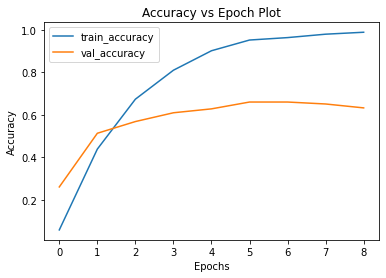

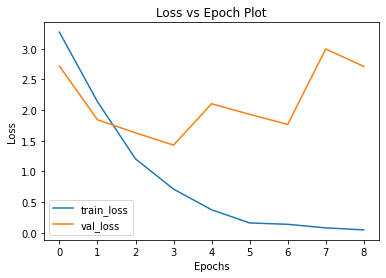

In [21]:
plt.plot(history.history['accuracy'], label="train_accuracy")
plt.plot(history.history['val_accuracy'], label="val_accuracy")
plt.title("Accuracy vs Epoch Plot")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label="train_loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.title("Loss vs Epoch Plot")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [22]:
# Saving the model

# model.save("../models/assignmnet_model.h5", save_format='h5')

In [23]:
model.evaluate(test_images)


15/15 [==============================] - 15s 971ms/step - loss: 1.6596 - accuracy: 0.6175


[1.6595560312271118, 0.617521345615387]

In [24]:
y_predicted = model.predict(test_images)

15/15 [==============================] - 15s 986ms/step


In [25]:
y_predicted.shape

(468, 26)

In [26]:
y_predicted[1]

array([1.9668419e-06, 2.0782213e-06, 2.2974239e-06, 1.5977354e-06,
       3.1735592e-05, 4.3466483e-05, 4.3545421e-03, 2.2815559e-03,
       1.9895835e-01, 7.7696288e-01, 1.0613868e-06, 3.8155014e-07,
       8.9564688e-05, 5.9200892e-07, 1.5023828e-06, 1.5247255e-04,
       3.3610440e-03, 1.8232361e-06, 6.7818328e-05, 3.4711959e-03,
       1.6145036e-07, 4.8092807e-06, 9.5744766e-03, 1.4321817e-04,
       6.0086372e-06, 4.8342568e-04], dtype=float32)

In [27]:
np.argmax(y_predicted[1])

9

In [28]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[2, 9, 25, 8, 8]

In [29]:
test_images.labels[:5]

[8, 0, 15, 20, 20]

In [30]:
# Using inception_v1/classification


In [31]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub

In [32]:

model_inception = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/inception_v1/classification/5", trainable=False),
    tf.keras.layers.Dense(26, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Conv2D)        (None, 222, 222, 16)      448       
                                                                 
 Conv_1 (Conv2D)             (None, 220, 220, 32)      4640      
                                                                 
 Pooling_1 (MaxPooling2D)    (None, 110, 110, 32)      0         
                                                                 
 Conv_2 (Conv2D)             (None, 108, 108, 32)      9248      
                                                                 
 Conv_3 (Conv2D)             (None, 106, 106, 64)      18496     
                                                                 
 Pooling_2 (MaxPooling2D)    (None, 53, 53, 64)        0         
                                                                 
 Conv_4 (Conv2D)             (None, 51, 51, 64)        3

In [33]:
model_inception.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics="accuracy"
)

In [34]:
history_inception = model_inception.fit(
    train_images,
    epochs = 20,   # max 15 epoch
    validation_data=val_images,
    callbacks=[es_callback,tb_callback]
)


Epoch 1/20
28/28 [==============================] - 68s 2s/step - loss: 3.5036 - accuracy: 0.0938 - val_loss: 2.8519 - val_accuracy: 0.1881
Epoch 2/20
28/28 [==============================] - 70s 3s/step - loss: 2.3762 - accuracy: 0.2792 - val_loss: 2.1986 - val_accuracy: 0.3165
Epoch 3/20
28/28 [==============================] - 62s 2s/step - loss: 1.9088 - accuracy: 0.4130 - val_loss: 1.9065 - val_accuracy: 0.3853
Epoch 4/20
28/28 [==============================] - 77s 3s/step - loss: 1.5513 - accuracy: 0.5503 - val_loss: 1.7793 - val_accuracy: 0.4128
Epoch 5/20
28/28 [==============================] - 76s 3s/step - loss: 1.3285 - accuracy: 0.6327 - val_loss: 1.6376 - val_accuracy: 0.5321
Epoch 6/20
28/28 [==============================] - 74s 3s/step - loss: 1.1697 - accuracy: 0.6819 - val_loss: 1.5540 - val_accuracy: 0.4954
Epoch 7/20
28/28 [==============================] - 73s 3s/step - loss: 1.0100 - accuracy: 0.7185 - val_loss: 1.0973 - val_accuracy: 0.6972
Epoch 8/20
28/28 [==

In [35]:
model_inception.evaluate(test_images)


15/15 [==============================] - 24s 2s/step - loss: 0.7571 - accuracy: 0.7799


[0.7570890784263611, 0.7799145579338074]

In [36]:
# Using Resnet

In [37]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub

In [38]:

model_resnet = tf.keras.Sequential([
  hub.KerasLayer("https://tfhub.dev/google/supcon/resnet_v1_200/imagenet/classification/1", trainable=False),
  tf.keras.layers.Dense(26, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Conv2D)        (None, 222, 222, 16)      448       
                                                                 
 Conv_1 (Conv2D)             (None, 220, 220, 32)      4640      
                                                                 
 Pooling_1 (MaxPooling2D)    (None, 110, 110, 32)      0         
                                                                 
 Conv_2 (Conv2D)             (None, 108, 108, 32)      9248      
                                                                 
 Conv_3 (Conv2D)             (None, 106, 106, 64)      18496     
                                                                 
 Pooling_2 (MaxPooling2D)    (None, 53, 53, 64)        0         
                                                                 
 Conv_4 (Conv2D)             (None, 51, 51, 64)        3

In [39]:
model_resnet.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics="accuracy"
)

In [ ]:
history_resnet = model_resnet.fit(
    train_images,
    epochs = 20,   # max 15 epoch
    validation_data=val_images,
    callbacks=[es_callback,tb_callback]
)

Epoch 1/20
28/28 [==============================] - 512s 18s/step - loss: 3.3148 - accuracy: 0.0709 - val_loss: 3.1400 - val_accuracy: 0.0963
Epoch 2/20
28/28 [==============================] - 521s 19s/step - loss: 2.9024 - accuracy: 0.1648 - val_loss: 2.9087 - val_accuracy: 0.1514
Epoch 3/20
28/28 [==============================] - 527s 19s/step - loss: 2.6728 - accuracy: 0.2471 - val_loss: 2.6891 - val_accuracy: 0.2156
Epoch 4/20
28/28 [==============================] - 515s 19s/step - loss: 2.4767 - accuracy: 0.3066 - val_loss: 2.5840 - val_accuracy: 0.2661
Epoch 5/20
28/28 [==============================] - 527s 19s/step - loss: 2.3975 - accuracy: 0.3055 - val_loss: 2.5372 - val_accuracy: 0.2385
Epoch 6/20
28/28 [==============================] - 512s 18s/step - loss: 2.2798 - accuracy: 0.3593 - val_loss: 2.4155 - val_accuracy: 0.3073
Epoch 7/20
28/28 [==============================] - 511s 18s/step - loss: 2.1588 - accuracy: 0.3833 - val_loss: 2.3319 - val_accuracy: 0.2936
Epoch 

In [ ]:
model_resnet.evaluate(test_images)